In [3]:
import matplotlib.pyplot as plt
import json

In [5]:
with open("bm25_qwen38b_retr50.json", "r", encoding="utf-8") as f:
    results = json.load(f)

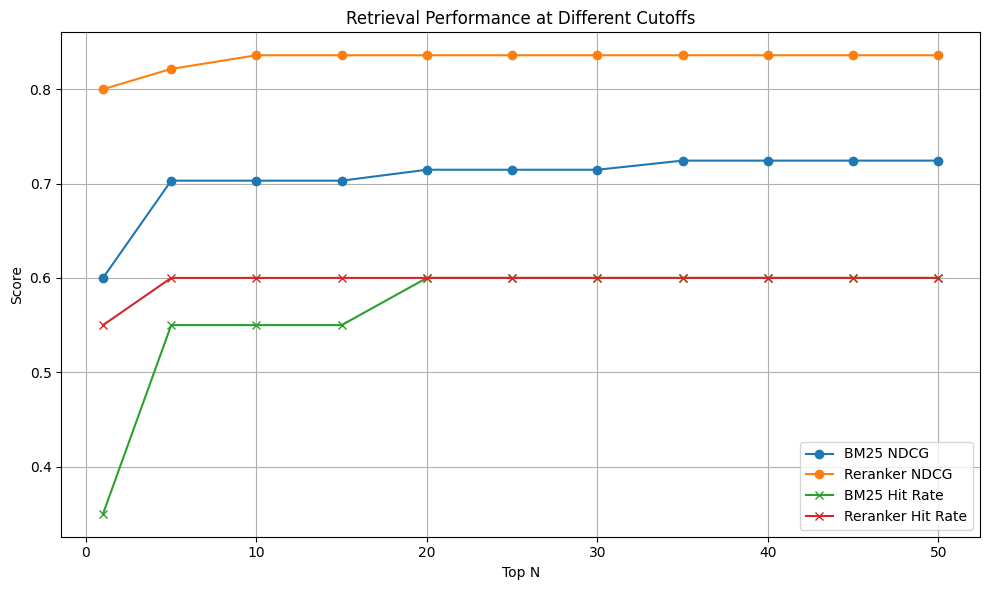

In [6]:
cutoff_list = results["cutoff_list"]
bm25_scores_at_n = results["bm25_scores_at_n"]
rerank_scores_at_n = results["rerank_scores_at_n"]

# Compute mean for each cutoff
bm25_ndcg_list = [sum(bm25_scores_at_n[str(n)]['ndcg'])/len(bm25_scores_at_n[str(n)]['ndcg']) for n in cutoff_list]
rerank_ndcg_list = [sum(rerank_scores_at_n[str(n)]['ndcg'])/len(rerank_scores_at_n[str(n)]['ndcg']) for n in cutoff_list]
bm25_hit_list = [sum(bm25_scores_at_n[str(n)]['hit'])/len(bm25_scores_at_n[str(n)]['hit']) for n in cutoff_list]
rerank_hit_list = [sum(rerank_scores_at_n[str(n)]['hit'])/len(rerank_scores_at_n[str(n)]['hit']) for n in cutoff_list]

plt.figure(figsize=(10,6))
plt.plot(cutoff_list, bm25_ndcg_list, marker='o', label='BM25 NDCG')
plt.plot(cutoff_list, rerank_ndcg_list, marker='o', label='Reranker NDCG')
plt.plot(cutoff_list, bm25_hit_list, marker='x', label='BM25 Hit Rate')
plt.plot(cutoff_list, rerank_hit_list, marker='x', label='Reranker Hit Rate')
plt.xlabel("Top N")
plt.ylabel("Score")
plt.title("Retrieval Performance at Different Cutoffs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()